In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [179]:
#importing the dataset
df=pd.read_csv(r"C:\Users\Pardhasaradhi\Downloads\Global_Pollution_Analysis.csv",encoding='cp1252')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [180]:
#handling missing data
df.isnull().sum()

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64

In [172]:
#Data transformation
scaler=StandardScaler()
df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index"]]= scaler.fit_transform(df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index"]])
df=pd.get_dummies(df,columns=["Country","Year"],drop_first=True)
print(df.columns.tolist())

['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)', 'Country_Albania', 'Country_Andorra', 'Country_Angola', 'Country_Antarctica (the territory South of 60 deg S)', 'Country_Antigua and Barbuda', 'Country_Argentina', 'Country_Armenia', 'Country_Aruba', 'Country_Australia', 'Country_Austria', 'Country_Bahamas', 'Country_Bahrain', 'Country_Bangladesh', 'Country_Barbados', 'Country_Belgium', 'Country_Belize', 'Country_Benin', 'Country_Bermuda', 'Country_Bhutan', 'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Botswana', 'Country_Bouvet Island (Bouvetoya)', 'Country_British Indian Ocean Territory (Chagos Archipelago)', 'Country_British Virgin Islands', 'Country_Brunei Darussalam', 'Country_Bulgaria', 'Country_Burundi', 

In [181]:
#descriptive statistics
df.describe()

,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2009.335000,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,5.765325,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,2000.000000,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,2004.000000,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,2010.000000,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,2014.000000,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,2019.000000,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


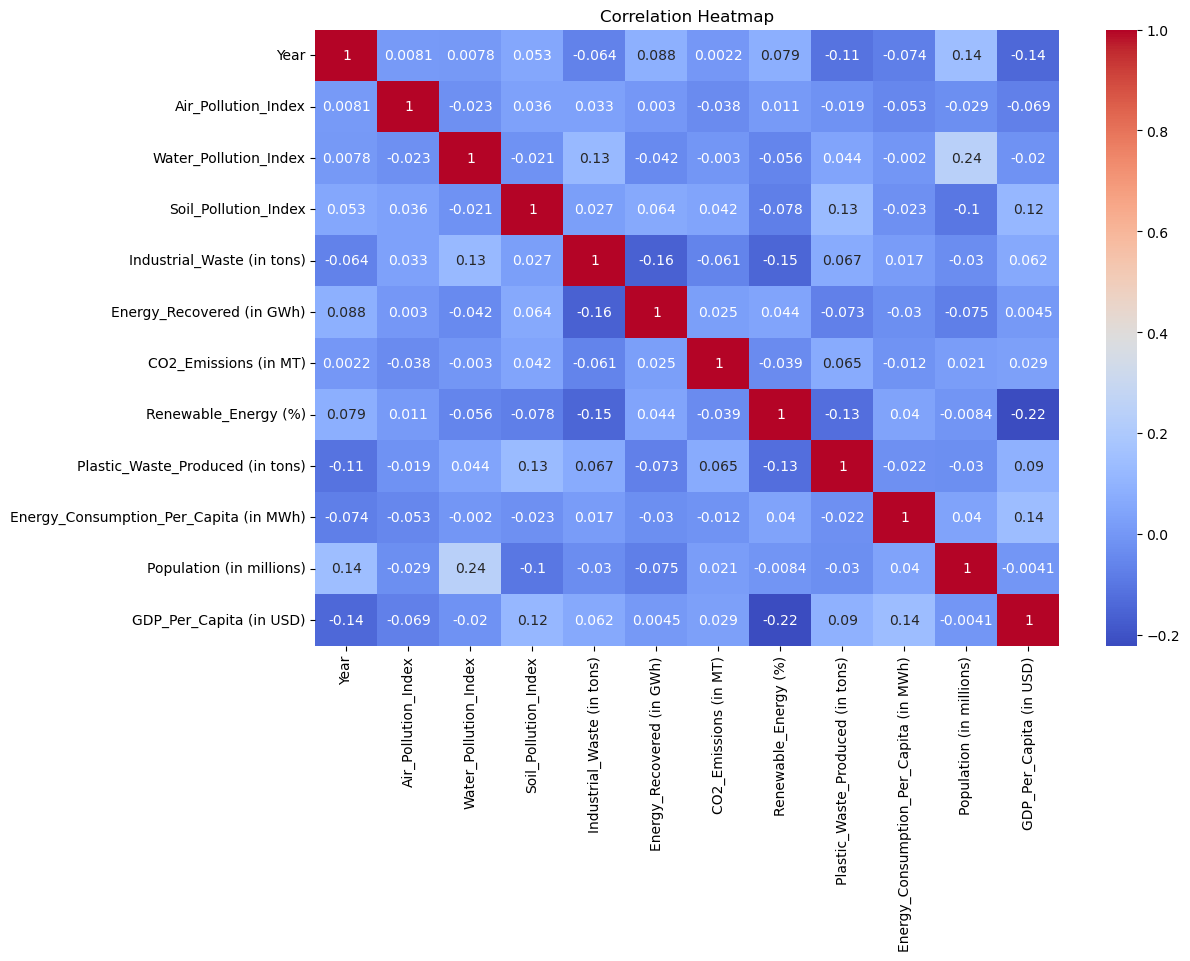

In [182]:
#correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

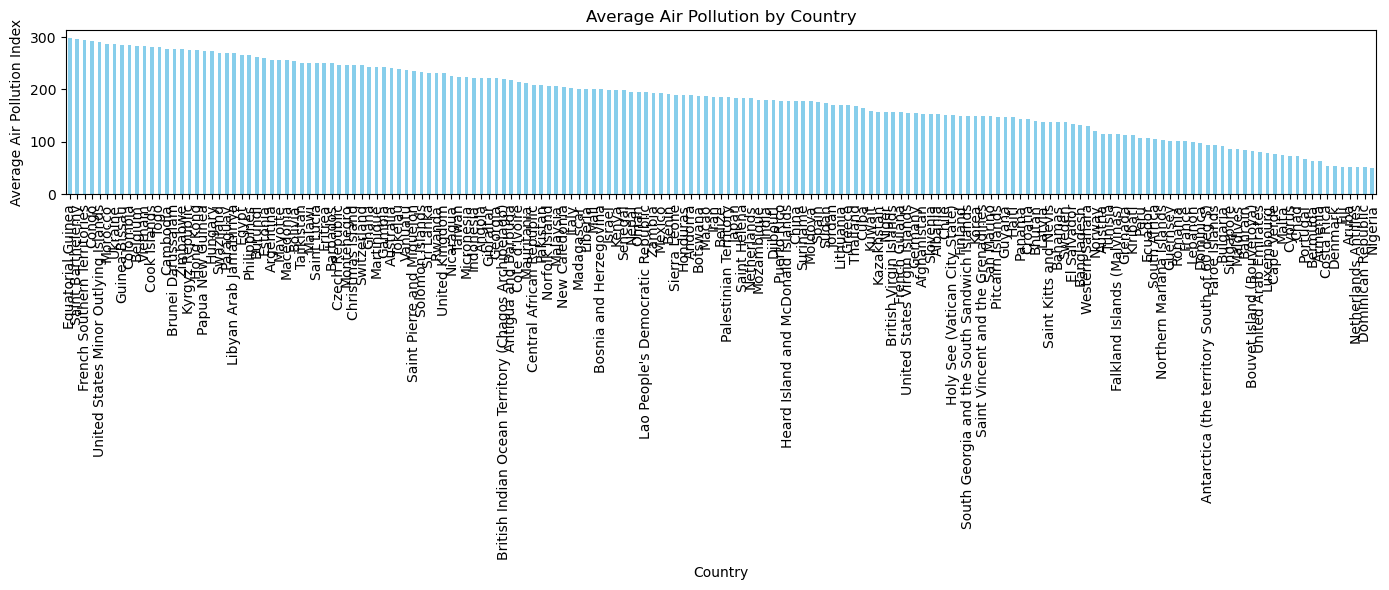

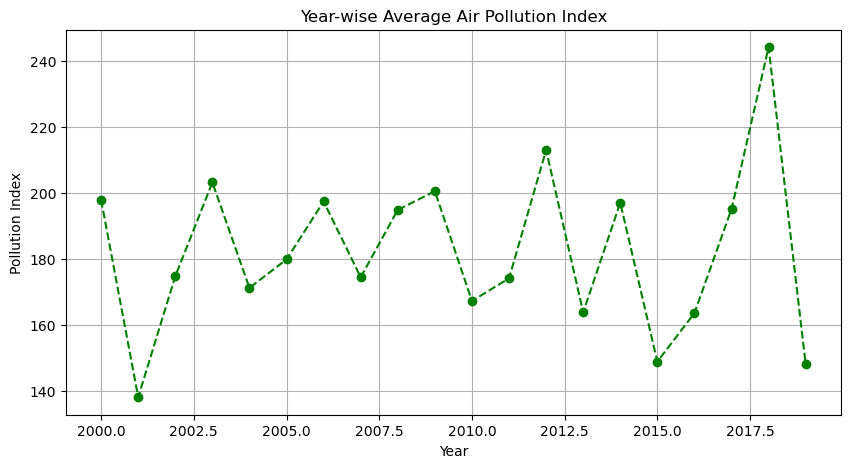

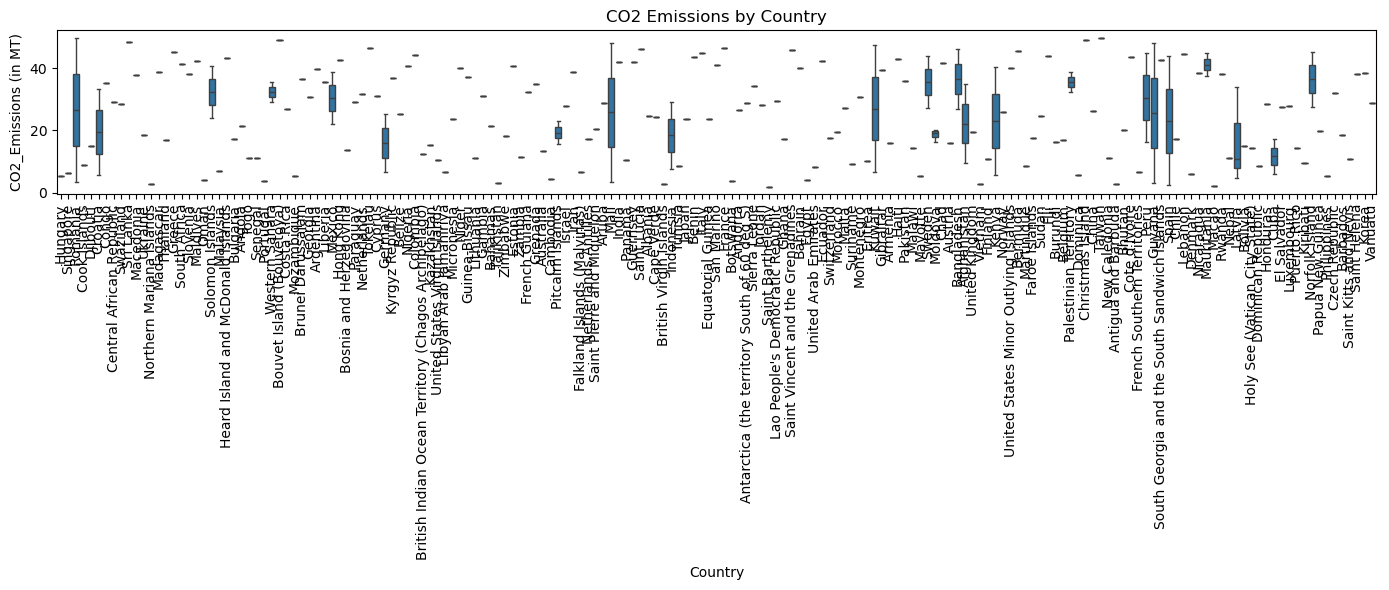

In [183]:
#visualization
country_pollution = df.groupby('Country')['Air_Pollution_Index'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
country_pollution.plot(kind='bar', color='skyblue')
plt.ylabel('Average Air Pollution Index')
plt.title('Average Air Pollution by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

yearly_trend = df.groupby('Year')['Air_Pollution_Index'].mean()
plt.figure(figsize=(10, 5))
yearly_trend.plot(marker='o', linestyle='--', color='green')
plt.title('Year-wise Average Air Pollution Index')
plt.ylabel('Pollution Index')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Country', y='CO2_Emissions (in MT)')
plt.title('CO2 Emissions by Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [184]:
#feauture engineering
yearly_trends = df.groupby('Year')[[
    'Air_Pollution_Index',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Energy_Recovered (in GWh)',
    'Energy_Consumption_Per_Capita (in MWh)'
]].mean().reset_index()


In [185]:
#linear regression
x=df[["Air_Pollution_Index","Water_Pollution_Index","Soil_Pollution_Index","CO2_Emissions (in MT)","Energy_Consumption_Per_Capita (in MWh)","Population (in millions)","GDP_Per_Capita (in USD)"]]
y=df[["Energy_Recovered (in GWh)"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 120.12
Mean Squared Error (MSE): 19651.28
R² Score: -0.12


In [186]:
#logistic regression
def categorize_pollution(api):
    if api <= 120:
        return 'Low'
    elif api <= 200:
        return 'Medium'
    else:
        return 'High'

df['Pollution_Level'] = df['Air_Pollution_Index'].apply(categorize_pollution)


In [187]:
le=LabelEncoder()
df["Pollution_Level_Encoded"]=le.fit_transform(df["Pollution_Level"])
x=df[["Water_Pollution_Index","Soil_Pollution_Index","CO2_Emissions (in MT)","Energy_Consumption_Per_Capita (in MWh)","Population (in millions)","GDP_Per_Capita (in USD)"]]
y=df["Pollution_Level_Encoded"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
log_model=LogisticRegression(max_iter=1000,solver='saga')
log_model.fit(x_train_scaled,y_train)
y_pred=log_model.predict(x_test_scaled)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='macro'):.2f}")

Accuracy:  0.32
Precision: 0.37
Recall:    0.29
F1 Score:  0.28


In [188]:
df["Pollution_Level_Encoded"].value_counts()

Pollution_Level_Encoded
0    80
2    73
1    47
Name: count, dtype: int64

<Figure size 600x500 with 0 Axes>

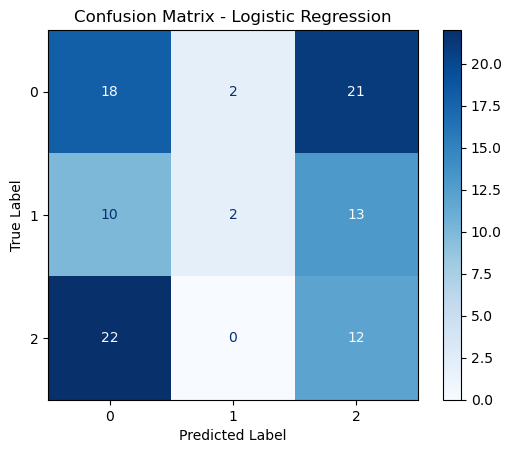

In [189]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_model.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Step 7 – Actionable Insights
Based on the Logistic Regression model results and EDA of the global pollution dataset, we suggest the following data-driven operational improvements:
1.Target High-Risk Regions for Pollution Control
Focus regulatory actions and awareness campaigns in countries with the highest predicted pollution levels.
Use model predictions to prioritize pollution mitigation policies.
2.Promote Urban Green Planning
Areas with higher population density often show increased pollution levels.
Encourage development of urban green spaces, eco-parks, and plantation drives in cities.
3.Optimize Industrial Emissions Regulations
Regions with high predicted pollution can be monitored more strictly using satellite + ground sensors.
Enforce stricter emission norms and provide incentives for cleaner technologies.
4.Invest in Pollution Source Tracking & Research
Model uncertainty and confusion between pollution levels hint at data complexity or noise.
Encourage sensor calibration, pollution source audits, and research into pollution source breakdown.
5.Enhance Energy Recovery from Waste
Countries with high pollution and waste production potential should invest in waste-to-energy plants.
Use model outputs to locate zones where energy recovery will have the maximum impact.
6.Educate the Public on Pollution Effects
In areas predicted to have medium or high pollution, launch community education programs.
Promote clean lifestyle practices like cycling, using public transport, and reducing plastic waste.

💡 Upgrade Modeling & Monitoring Systems
Since the model accuracy was low (~39%), future systems should use better feature engineering, resampling techniques, or advanced models (e.g., XGBoost, Random Forest) for real-time pollution forecasting.

Final Summary
The Global Pollution and Energy Recovery prediction model was developed using both Linear and Logistic Regression techniques.

Linear Regression was initially applied to predict pollution levels as a continuous variable. However, the model showed poor performance, with a Mean Absolute Error (MAE) of 120.12, Mean Squared Error (MSE) of 19651.28, and a negative R² score of -0.12, indicating that the model could not effectively capture the underlying relationship in the data.

To address this, Logistic Regression was employed to classify pollution severity into discrete categories such as Low, Medium, and High. The classification model achieved an accuracy of 32%, precision of 37%, recall of 29%, and an F1-score of 28%. While performance is modest, the model still highlights patterns that can guide environmental strategies.